## Nygaard TMD

/Users/madslangkjaerjakobsen/Desktop/WTABL/SimpleLayout


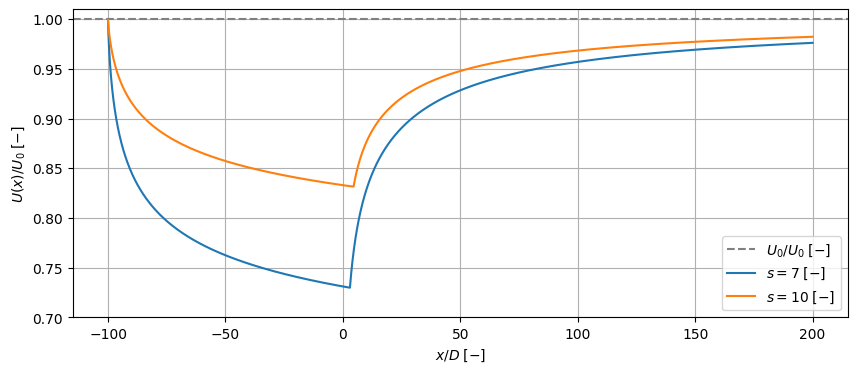

In [1]:
# General imports
import os
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, nsolve, log

def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0):

    import numpy as np

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**0.8)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**0.8)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed


    return x, uw, U_h0

d_tal = 480

D = 100

# calculate_wind_speed(x1, x2, x3, z_h, D, ct, s_x, s_y, U_G, C_star):
x_s7, uw_s7, U_h0_s7 = calculate_wind_speed(0, 10000, 30000, 100, 100, 0.8, 7, 7, 10.0)
#print("deficit uw_s7: ", 10.0 - uw_s7[-1])
#x_s8, uw_s8, U_h0_s8 = calculate_wind_speed(0, 10000,  30000 + 1, 100, 100, 0.8, 8, 8, 10.0)
#print("uw_s8: ", uw_s8[-1])
#x_s9, uw_s9, U_h0_s9 = calculate_wind_speed(0, 10000,   30000 + 1, 100, 100, 0.8, 9, 9, 10.0)
#print("uw_s9: ", uw_s9[-1])
x_s10, uw_s10, U_h0_s10 = calculate_wind_speed(0, 10000,  30000 + 1, 100, 100, 0.8, 10, 10, 10.0)
#print("uw_s10: ", uw_s10[-1])

plt.figure(figsize=(10, 4))
plt.axhline(y=1.0, color='grey', linestyle='--', label=r'$ U_0/U_0 \; [-] $')
plt.plot(x_s7/D-100, uw_s7/10, label=r'$ s = 7 \; [-] $', color='#1f77b4')
plt.plot(x_s10/D-100, uw_s10/10, label=r'$ s = 10 \; [-] $', color='#ff7f0e')

plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ U(x)/U_0 \; [-] $')
plt.ylim(0.7, 1.01)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [2]:
from sympy import symbols, limit, oo, ln

x1 = 0
x2 = 10000
x3 = 30000

z_h = 100
D = 100
s_x = 10
s_y = 10
C_T = 0.8
U_G = 11.87
C_star = 4.5

f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]
z_0lo = 0.0001 # surface rughness length [m]

ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
print("ct: ", ct)
nu_star = 28 * np.sqrt(ct)
print("nu_star: ", nu_star)
beta =  nu_star / (1 + nu_star)
print("beta: ", beta)
z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(ct/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("z_0hi: ", z_0hi)
u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
print("u_star_lo: ", u_star_lo)
u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
print("u_star_hi: ", u_star_hi)
U_h0 = u_star_lo / k * np.log(z_h / z_0lo)
print("U_h0: ", U_h0)
z0_WF = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
print("z0_WF: ", z0_WF)

from sympy import symbols, limit, oo, ln, sqrt, pi

x = symbols('x')

h1 = z_h + (x / z0_WF)**(4/5)
h2 = ((x - x2)/z0_WF)**(4/5)

# Use SymPy's ln(), not np.log()
uw_deficit = U_h0 * (ln(h1 / z_0lo) * ln(z_h / z0_WF)) / (ln(h1 / z0_WF) * ln(z_h/z_0lo))
uw_recovery = U_h0 * (ln(h1 / z_0lo) * ln(h2 / z0_WF)) / (ln(h1 / z0_WF) * ln(h2 / z_0lo))

# Take the limit as x → ∞
lim_inf = limit(uw_deficit, x, 0)
print("Limit as x → 0:", round(lim_inf,0))

# Take the limit as x → ∞
lim_inf = limit(uw_deficit, x, oo)
print("Limit as x → ∞:", round(lim_inf,0))

ct:  0.003141592653589793
nu_star:  1.56939754059142
beta:  0.6108037062377581
z_0hi:  0.040470497524118396
u_star_lo:  0.28960587639689944
u_star_hi:  0.45691028954745894
U_h0:  10.002632607524651
z0_WF:  0.23568827613865057
Limit as x → 0: 10.0000000000000
Limit as x → ∞: 4.00000000000000


## Model comparison to pywake


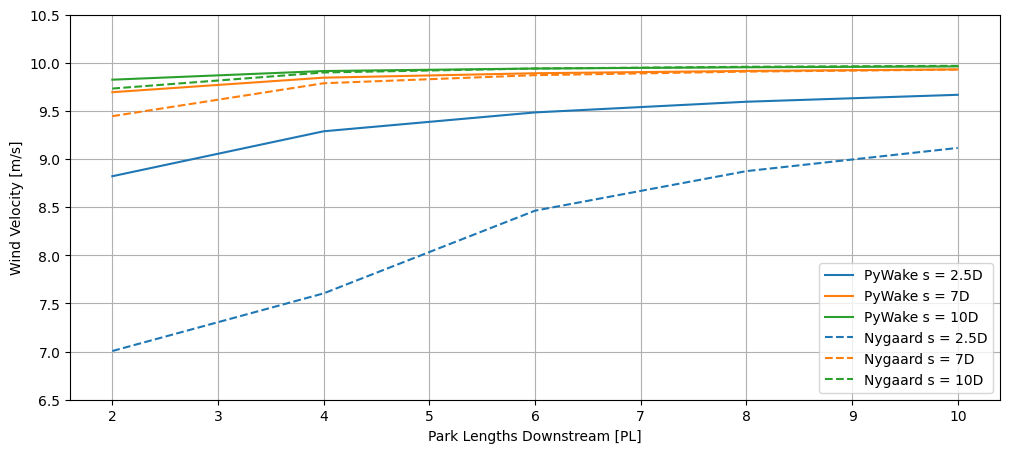

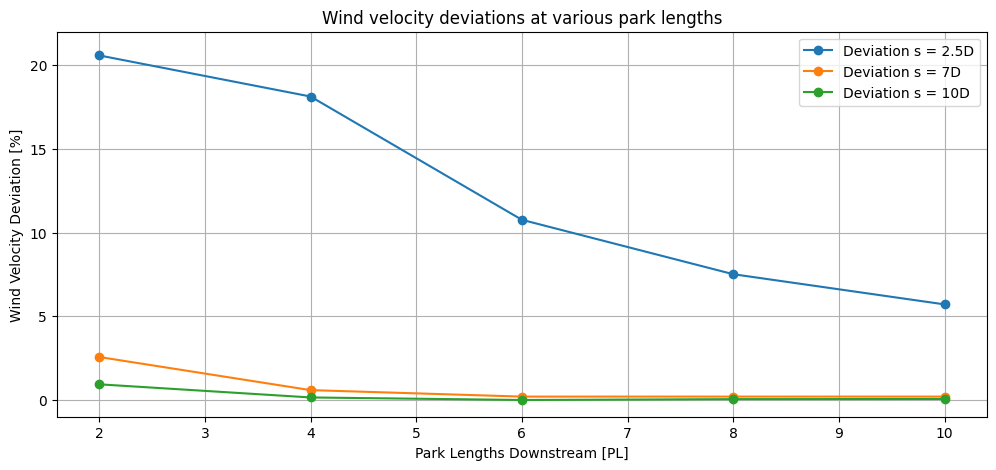

In [3]:
park_lengths = [2, 4, 6, 8, 10]  # Park lengths in PL

# Wind velocities from Pywake Propagate Downstream
velocities_2_5D = [8.822, 9.289, 9.485, 9.596, 9.668]
velocities_7D   = [9.695, 9.846, 9.892, 9.916, 9.932]
velocities_10D  = [9.825, 9.915, 9.941, 9.954, 9.963]

# Wind velocities from Nygaard IBL Recovery
nygaard_2_5D = [7.006, 7.605, 8.464, 8.875, 9.116]
nygaard_7D   = [9.446, 9.788, 9.872, 9.909, 9.930]
nygaard_10D  = [9.733, 9.900, 9.941, 9.959, 9.969]

# Deviations [%] between PyWake and Nygaard for each spacing
deviation_2_5D = [20.585, 18.129, 10.764, 7.514, 5.710]
deviation_7D   = [2.568, 0.589, 0.202, 0.202, 0.202]
deviation_10D  = [0.936, 0.151, 0.000, 0.050, 0.060]

# Plot wind velocities as a function of park lengths
plt.figure(figsize=(12, 5))
plt.plot(park_lengths, velocities_2_5D, label='PyWake s = 2.5D', color='#1f77b4')
plt.plot(park_lengths, velocities_7D, label='PyWake s = 7D', color='#ff7f0e')
plt.plot(park_lengths, velocities_10D, label='PyWake s = 10D', color='#2ca02c')
plt.plot(park_lengths, nygaard_2_5D, label='Nygaard s = 2.5D', linestyle='--', color='#1f77b4')
plt.plot(park_lengths, nygaard_7D, label='Nygaard s = 7D', linestyle='--', color='#ff7f0e')
plt.plot(park_lengths, nygaard_10D, label='Nygaard s = 10D', linestyle='--', color='#2ca02c')
#plt.title('Wind velocity at various park lengths')
plt.xlabel('Park Lengths Downstream [PL]')
plt.ylabel('Wind Velocity [m/s]')
plt.ylim(6.5, 10.5)
plt.legend()
plt.grid(True)
plt.show()

# Plot deviations as a function of park lengths
plt.figure(figsize=(12, 5))
plt.plot(park_lengths, deviation_2_5D, label='Deviation s = 2.5D', marker='o')
plt.plot(park_lengths, deviation_7D, label='Deviation s = 7D', marker='o')
plt.plot(park_lengths, deviation_10D, label='Deviation s = 10D', marker='o')
plt.title('Wind velocity deviations at various park lengths')
plt.xlabel('Park Lengths Downstream [PL]')
plt.ylabel('Wind Velocity Deviation [%]')
plt.ylim(-1.0, 22)
plt.legend()
plt.grid(True)
plt.show()

$ w_{width} = ((n-1) \cdot D \cdot s_y \cdot 1.08) + (0.04 + 0.01 \cdot s_y) \cdot x $
## Fit til efter alle wake er mixet
## Lav faktorer baseret på wake og ikke waket area?

[16124. 17004. 17884. 18764. 19644. 20524. 21404. 22284. 23164.]


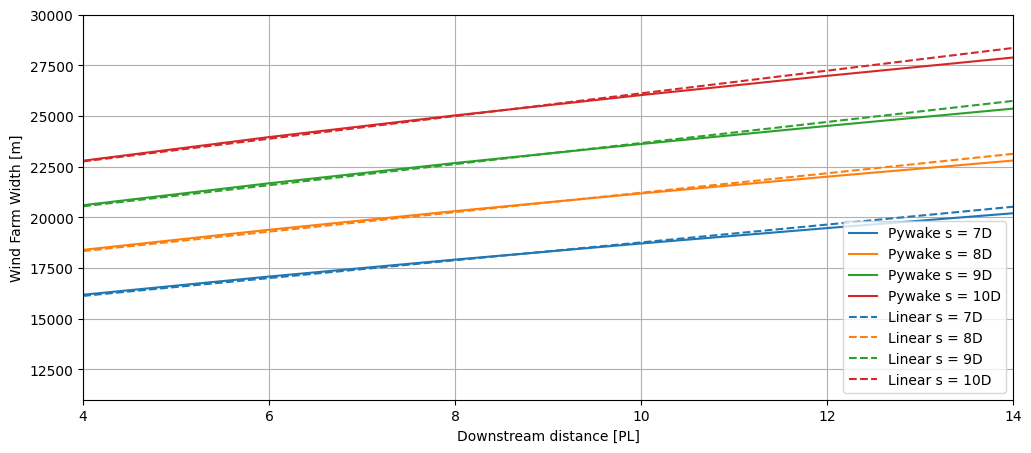

In [4]:
# Park width calculation
s_x =10
n = 20
lf = 4 * D*s_x
D = 100  # rotor diameter
x = np.linspace(4 * lf, 20 * lf, 9)

s7_ww = [16182, 17080, 17916, 18710, 19470, 20202, 20910, 21596, 22266] 
s8_ww = [18396, 19388, 20310, 21180, 22008, 22804, 23572, 24316, 25038] 
s9_ww = [20600, 21682, 22682, 23620, 24512, 25366, 26188, 26980, 27099]
s10_ww = [22796, 23962, 25032, 26034, 26984, 27888, 28756, 28999, 28999]

s_x7 = 7
k7 = 0.04 + 0.01 * s_x7
wf7 = (n-1) * D*s_x7 * 1.08

s_x8 = 8
k8 = 0.04 + 0.01*s_x8
wf8 = (n-1) * D*s_x8 * 1.08

s_x9 = 9
k9 = 0.04 + 0.01*s_x9
wf9 = (n-1) * D*s_x9 * 1.08

s_x10 = 10
k10 = 0.04 + 0.01*s_x10
wf10 = (n-1) * D*s_x10 * 1.08

ww_s7 = wf7 + k7 * x
ww_s8 = wf8 + k8 * x
ww_s9 = wf9 + k9 * x
ww_s10 = wf10 + k10 * x

print(ww_s7)

plt.figure(figsize=(12, 5))
plt.plot(x/lf, s7_ww, label='Pywake s = 7D', color='#1f77b4')
plt.plot(x/lf, s8_ww, label='Pywake s = 8D', color='#ff7f0e')
plt.plot(x/lf, s9_ww, label='Pywake s = 9D', color='#2ca02c')
plt.plot(x/lf, s10_ww, label='Pywake s = 10D', color='#d62728')
plt.plot(x/lf, ww_s7, label='Linear s = 7D', linestyle='--', color='#1f77b4')
plt.plot(x/lf, ww_s8, label='Linear s = 8D', linestyle='--', color='#ff7f0e')
plt.plot(x/lf, ww_s9, label='Linear s = 9D', linestyle='--', color='#2ca02c')
plt.plot(x/lf, ww_s10, label='Linear s = 10D', linestyle='--', color='#d62728')
plt.xlabel('Downstream distance [PL]')
plt.ylabel('Wind Farm Width [m]')
#plt.title('Wind Farm Width vs Downstream Distance')
plt.xlim(4, 14)
plt.ylim(11000, 30000)
plt.legend()
plt.grid(True)
plt.show()

# Alex's firkanter :)

In [5]:
h_farm = D
w_farm = s_x*D * 12
l_farm = w_farm # Midlertidigt pga. kvadrat
A_0 = w_farm * h_farm
x_meas = 400*D

x, u_tdm, U_h0 = calculate_wind_speed(0, l_farm, x_meas, 100, D, 0.9, 10, 10, 10)
u_s = (U_h0 - u_tdm[-1]) / U_h0
print('u_s', u_s)

u_s 0.015493146854108807


In [6]:
kx = (- h_farm/4 - w_farm/4 + (np.sqrt(h_farm**2 + 2*A_0 + w_farm**2 - 4*A_0 + 4*(A_0 * (C_T / (2*(u_s - u_s**2))))))/4)/x_meas
print('kx:', round(kx,2), '[m/m]')

kx: 0.03 [m/m]


# Save to CSV

In [7]:
k = int(kx*x_meas)
y_meas = np.linspace(0 - k, w_farm + k, w_farm+(2*k)+1)
U = np.full_like(y_meas, u_tdm[-1])

In [8]:
data = pd.DataFrame({
    "y_wake": y_meas / D,
    "U_norm": U / U_h0,
})
data.to_csv(f"../ArbitraryLayouts/ValidationData/mREC{int(x_meas / D)}D.csv", index=False)

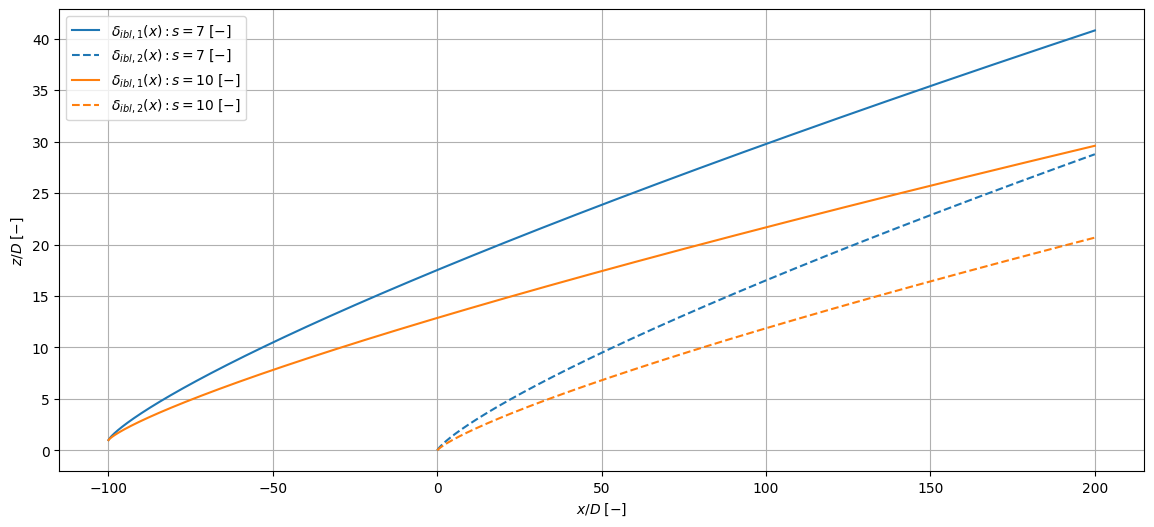

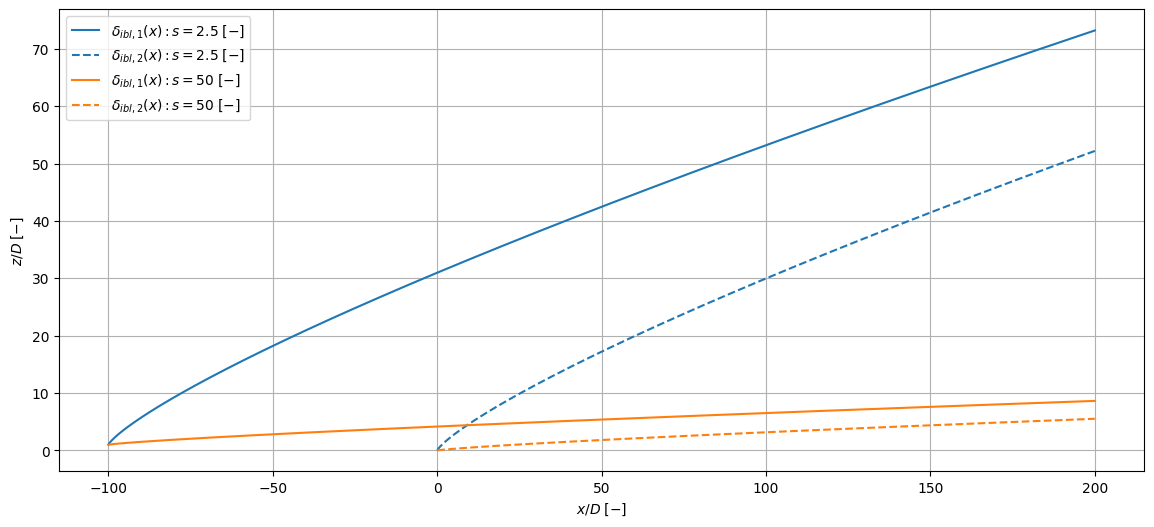

In [9]:
def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0):

    import numpy as np

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**0.8)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**0.8)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed

    return x, uw, U_h0, h1, h2

d_tal = 300

# calculate_wind_speed(x1, x2, x3, z_h, D, ct, s_x, s_y, U_G, C_star):
x_s7, uw_s7, U_h0_s7, h1_s7, h2_s7 = calculate_wind_speed(0, 10000, d_tal*100 + 1, 100, 100, 0.8, 7, 7, 10.0)
x_s10, uw_s10, U_h0_s10, h1_s10, h2_s10 = calculate_wind_speed(0, 10000,  d_tal*100 + 1, 100, 100, 0.8, 10, 10, 10.0)

plt.figure(figsize=(14, 6))

plt.plot(x_s7/D-100, h1_s7/D, label=r'$ \delta_{ibl,1}(x): s=7 \; [-]$', color='#1f77b4')
plt.plot(x_s7/D-100, h2_s7/D, label=r'$ \delta_{ibl,2}(x): s=7 \; [-]$', linestyle='--', color='#1f77b4')
plt.plot(x_s10/D-100, h1_s10/D, label=r'$ \delta_{ibl,1}(x): s=10 \; [-]$', color='#ff7f0e')
plt.plot(x_s10/D-100, h2_s10/D, label=r'$ \delta_{ibl,2}(x): s=10 \; [-]$', linestyle='--', color='#ff7f0e')

plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ z/D \; [-] $')
#plt.title('h1 and h2 for s=7 and s=10')
plt.legend()
plt.grid(True)
plt.show()

# calculate_wind_speed(x1, x2, x3, z_h, D, ct, s_x, s_y, U_G, C_star):
x_s25, uw_s25, U_h0_s25, h1_s25, h2_s25 = calculate_wind_speed(0, 10000, d_tal*100 + 1, 100, 100, 0.8, 2.5, 2.5, 10.0)
x_s50, uw_s50, U_h0_s50, h1_s50, h2_s50 = calculate_wind_speed(0, 10000,  d_tal*100 + 1, 100, 100, 0.8, 50, 50, 10.0)

plt.figure(figsize=(14, 6))

plt.plot(x_s25/D-100, h1_s25/D, label=r'$ \delta_{ibl,1}(x): s=2.5 \; [-]$', color='#1f77b4')
plt.plot(x_s25/D-100, h2_s25/D, label=r'$ \delta_{ibl,2}(x): s=2.5 \; [-]$', linestyle='--', color='#1f77b4')
plt.plot(x_s50/D-100, h1_s50/D, label=r'$ \delta_{ibl,1}(x): s=50 \; [-]$', color='#ff7f0e')
plt.plot(x_s50/D-100, h2_s50/D, label=r'$ \delta_{ibl,2}(x): s=50 \; [-]$', linestyle='--', color='#ff7f0e')

plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ z/D \; [-] $')
#plt.title('h1 and h2 for s=7 and s=10')
plt.legend()
plt.grid(True)
plt.show()

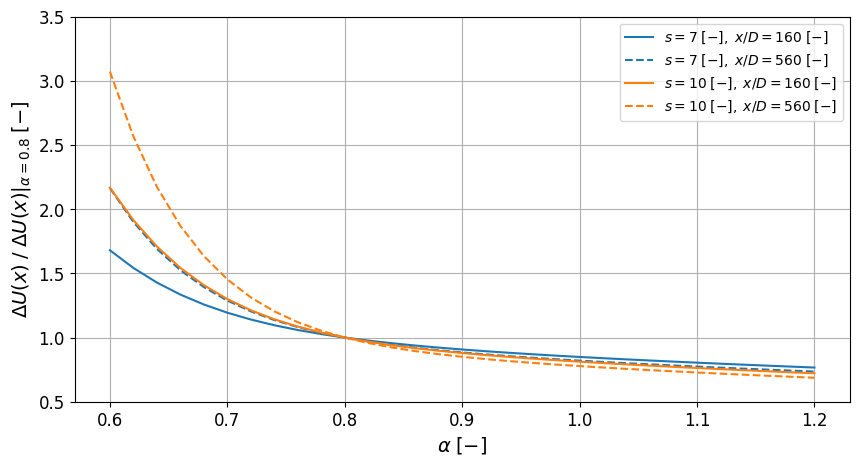

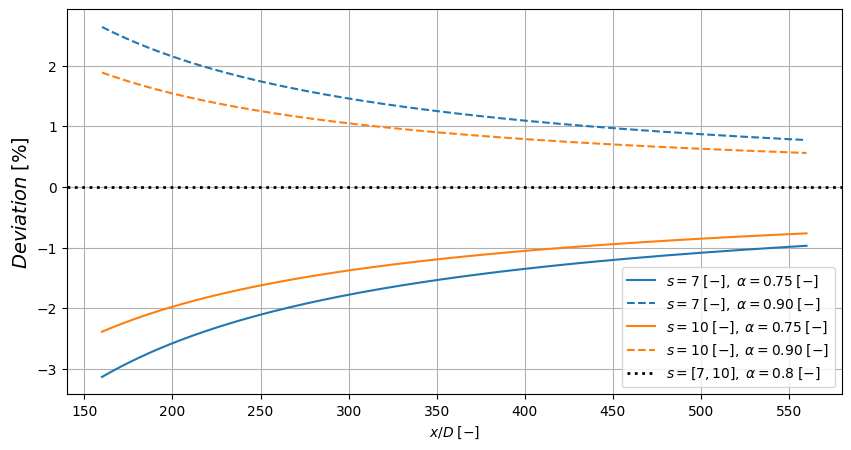

In [10]:
def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0, alpha):

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**alpha)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**alpha)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed


    return x, uw, U_h0

alpha_array_s7_160 = []
alpha_array_s7_560 = []
alpha_array_s10_160 = []
alpha_array_s10_560 = []

for i in range(0, 31):
    alpha = 0.6 + 0.02 * i

    x_s7_160, uw_s7_160, U_h0_s7_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 7, 7, 10.0, alpha)
    alpha_array_s7_160.append(U_h0_s7_160-uw_s7_160[-1])

    x_s7_560, uw_s7_560, U_h0_s7_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 7, 7, 10.0, alpha)
    alpha_array_s7_560.append(U_h0_s7_560-uw_s7_560[-1])

    x_s10_160, uw_s10_160, U_h0_s10_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 10, 10, 10.0, alpha)
    alpha_array_s10_160.append(U_h0_s10_160-uw_s10_160[-1])

    x_s10_560, uw_s10_560, U_h0_s10_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 10, 10, 10.0, alpha)

    alpha_array_s10_560.append(U_h0_s10_560-uw_s10_560[-1])

x_norm_s7_160, uw_norm_s7_160, U_h0_norm_s7_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 7, 7, 10.0, 0.8)
U_norm_s7_160 = U_h0_norm_s7_160 - uw_norm_s7_160[-1]
alpha_array_s7_160 = np.array(alpha_array_s7_160)
alpha_array_norm_s7_160 = np.array(alpha_array_s7_160/U_norm_s7_160)

x_norm_s7_560, uw_norm_s7_560, U_h0_norm_s7_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 7, 7, 10.0, 0.8)
U_norm_s7_560 = U_h0_norm_s7_560 - uw_norm_s7_560[-1]
alpha_array_s7_560 = np.array(alpha_array_s7_560)
alpha_array_norm_s7_560 = np.array(alpha_array_s7_560/U_norm_s7_560)


x_norm_s10_160, uw_norm_s10_160, U_h0_norm_s10_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 10, 10, 10.0, 0.8)
U_norm_s10_160 = U_h0_norm_s10_160 - uw_norm_s10_160[-1]
alpha_array_s10_160 = np.array(alpha_array_s10_160)

alpha_array_norm_s10_160 = np.array(alpha_array_s10_160/U_norm_s10_160)

x_norm_s10_560, uw_norm_s10_560, U_h0_norm_s10_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 10, 10, 10.0, 0.8)
U_norm_s10_560 = U_h0_norm_s10_560 - uw_norm_s10_560[-1]
alpha_array_s10_560 = np.array(alpha_array_s10_560)
alpha_array_norm_s10_560 = np.array(alpha_array_s10_560/U_norm_s10_560)

x = np.arange(0.6, 1.22, 0.02)

plt.figure(figsize=(10, 5))
plt.plot(x, alpha_array_norm_s7_160, label=r'$ s = 7 \; [-], \; x/D = 160 \; [-] $', color='#1f77b4')
plt.plot(x, alpha_array_norm_s7_560, label=r'$ s = 7 \; [-], \; x/D = 560 \; [-] $', color='#1f77b4', linestyle='--')
plt.plot(x, alpha_array_norm_s10_160, label=r'$ s = 10 \; [-], \; x/D = 160 \; [-] $', color='#ff7f0e')
plt.plot(x, alpha_array_norm_s10_560, label=r'$ s = 10 \; [-], \; x/D = 560 \; [-] $', color='#ff7f0e', linestyle='--')
plt.xlabel(r'$ \alpha \; [-] $', fontsize=14)
plt.ylabel(r'$ \Delta U(x) \; / \; \Delta U(x) |_{\alpha = 0.8} \; [-] $', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 3.5)
plt.grid(True)
plt.legend()
plt.show()

deviation_array_s7_a075 = []
deviation_array_s7_a090 = []
deviation_array_s10_a075 = []
deviation_array_s10_a090 = []


for i in range(0, 1000):

    d = np.linspace(26000, 66000, 1000)

    x_s7_a075, uw_s7_a075, U_h0_s7_a075 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 0.75)
    deviation_array_s7_a075.append(U_h0_s7_a075-uw_s7_a075[-1])

    x_s7_a090, uw_s7_a090, U_h0_s7_a090 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 0.90)
    deviation_array_s7_a090.append(U_h0_s7_a090-uw_s7_a090[-1])

    x_s10_a075, uw_s10_a075, U_h0_s10_a075 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 0.75)
    deviation_array_s10_a075.append(U_h0_s10_a075-uw_s10_a075[-1])

    x_s10_a090, uw_s10_a090, U_h0_s10_a090 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 0.90)
    deviation_array_s10_a090.append(U_h0_s10_a090-uw_s10_a090[-1])

x_s7_norm, uw_s7_norm, U_h0_s7_norm = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 0.8)
x_s10_norm, uw_s10_norm, U_h0_s10_norm = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 0.8)

deviation_array_s7_a075 = np.array(deviation_array_s7_a075)
deviation_array_s7_a075 = (deviation_array_s7_a075/uw_s7_norm[-1])*100

deviation_array_s7_a090 = np.array(deviation_array_s7_a090)
deviation_array_s7_a090 = (deviation_array_s7_a090/uw_s7_norm[-1])*100

deviation_array_s10_a075 = np.array(deviation_array_s10_a075)
deviation_array_s10_a075 = (deviation_array_s10_a075/uw_s10_norm[-1])*100

deviation_array_s10_a090 = np.array(deviation_array_s10_a090)
deviation_array_s10_a090 = (deviation_array_s10_a090/uw_s10_norm[-1])*100

plt.figure(figsize=(10, 5))
plt.plot(d/100-100, -deviation_array_s7_a075, label=r'$ s = 7 \; [-], \; \alpha = 0.75 \; [-] $', color='#1f77b4')
plt.plot(d/100-100, deviation_array_s7_a090, label=r'$ s = 7 \; [-], \; \alpha = 0.90 \; [-] $', color='#1f77b4', linestyle='--')
plt.plot(d/100-100, -deviation_array_s10_a075, label=r'$ s = 10 \; [-], \; \alpha = 0.75 \; [-] $', color='#ff7f0e')
plt.plot(d/100-100, deviation_array_s10_a090, label=r'$ s = 10 \; [-], \; \alpha = 0.90 \; [-] $', color='#ff7f0e', linestyle='--')
plt.axhline(0, color='k', linestyle=':', linewidth=2, label=r'$ s = [7,10], \; \alpha = 0.8 \; [-] $')
plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ Deviation \; [\%] $', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

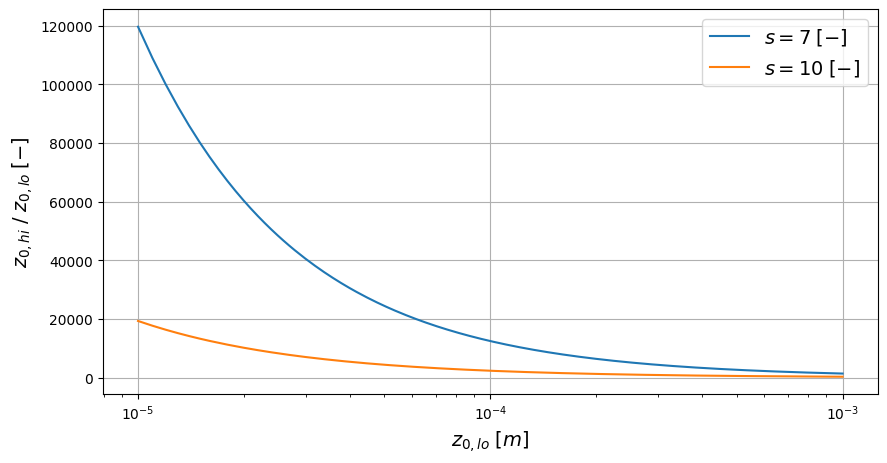

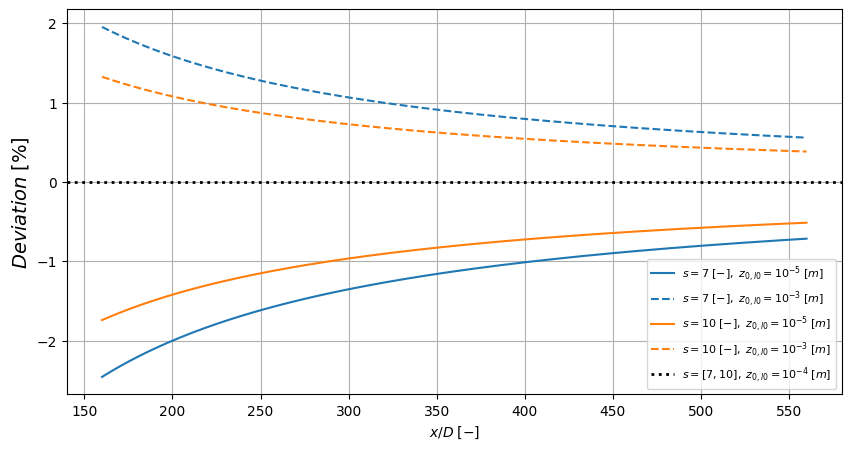

"\nx = [160, 240, 320, 400, 480, 560]\ns7_z0lom2 = [1.860, 1.527, 1.075, 1.389, 1.695, 2.041]\ns10_z0lom2 = [1.961, 3.226, 2.273, 2.941, 3.571, 4.348]\ns7_z0lod10 = [-4.651, -5.344, -5.376, -5.556, -5.085, -8.333]\ns10_z0lod10 = [-6.863, -6.452, -6.818, -8.824, -7.143, -8.696]\n\nplt.figure(figsize=(10, 6))\nplt.plot(x, s7_z0lom2, color='#1f77b4', label=r'$ s=7 \\; [-]: \\; z_{0,lo} = 2 \\cdot 10^{-4} \\; [m] $')\nplt.plot(x, s7_z0lod10, color='#1f77b4', label=r'$ s=7 \\; [-]: \\; z_{0,lo} = 1 \\cdot 10^{-5} \\; [m] $', linestyle='--')\nplt.plot(x, s10_z0lom2, color='#ff7f0e', label=r'$ s=10 \\; [-]: \\; z_{0,lo} = 2 \\cdot 10^{-4} \\; [m] $')\nplt.plot(x, s10_z0lod10, color='#ff7f0e', label=r'$ s=10 \\; [-]: \\; z_{0,lo} = 1 \\cdot 10^{-5} \\; [m] $', linestyle='--')\nplt.xlabel(r'$ x/D \\; [-] $', fontsize=14)\nplt.ylabel(r'$ Deviation \\; [\\%] $', fontsize=14)\nplt.legend(fontsize=14)\nplt.grid(True)\nplt.tick_params(axis='both', which='major', labelsize=14)\nplt.show()\n"

In [11]:
z_h = 100
D = 100
C_T = 0.8
s_x = 7
s_y = 7
U_h0 = 10
k = 0.4

k = 0.4 # Von Karman constant [-]
z0lo = np.linspace(0.00005, 0.001, 1000)

ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
#print("ct: ", ct)
nu_star = 28 * np.sqrt(ct)
#print("nu_star: ", nu_star)
beta =  nu_star / (1 + nu_star)
#print("beta: ", beta)
z0_WFs7 = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
#print("z0_WF: ", max(z0_WF))

z_h = 100
D = 100
C_T = 0.8
s_x = 10
s_y = 10
U_h0 = 10
k = 0.4

k = 0.4 # Von Karman constant [-]
z0lo = np.linspace(0.00001, 0.001, 1000)

ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
#print("ct: ", ct)
nu_star = 28 * np.sqrt(ct)
#print("nu_star: ", nu_star)
beta =  nu_star / (1 + nu_star)
#print("beta: ", beta)
z0_WFs10 = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
#print("z0_WF: ", max(z0_WF))

plt.figure(figsize=(10, 5))
plt.plot(z0lo, z0_WFs7/z0lo, label=r'$ s=7 \; [-]$', color='#1f77b4')
plt.plot(z0lo, z0_WFs10/z0lo, label=r'$ s=10 \; [-]$', color='#ff7f0e')
plt.xscale('log')
plt.ylabel(r'$ z_{0,hi} \; / \; z_{0,lo} \; [-]$', fontsize=14)
plt.xlabel(r'$ z_{0,lo} \; [m] $', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0, z0factor):

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = z0factor * 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**alpha)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**alpha)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed


    return x, uw, U_h0

deviation_array_s7_d10 = []
deviation_array_s7_m10 = []
deviation_array_s10_d10 = []
deviation_array_s10_m10 = []


for i in range(0, 1000):

    d = np.linspace(26000, 66000, 1000)

    x_s7_d10, uw_s7_d10, U_h0_s7_d10 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 0.10)
    deviation_array_s7_d10.append(U_h0_s7_d10-uw_s7_d10[-1])

    x_s7_m10, uw_s7_m10, U_h0_s7_m10 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 10)
    deviation_array_s7_m10.append(U_h0_s7_a090-uw_s7_m10[-1])

    x_s10_d10, uw_s10_d10, U_h0_s10_d10 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 0.10)
    deviation_array_s10_d10.append(U_h0_s10_d10-uw_s10_d10[-1])

    x_s10_m10, uw_s10_m10, U_h0_s10_m10 = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 10)
    deviation_array_s10_m10.append(U_h0_s10_m10-uw_s10_m10[-1])

x_s7_norm, uw_s7_norm, U_h0_s7_norm = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 1.0)
x_s10_norm, uw_s10_norm, U_h0_s10_norm = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 1.0)

deviation_array_s7_d10 = np.array(deviation_array_s7_d10)
deviation_array_s7_d10 = (deviation_array_s7_d10/uw_s7_norm[-1])*100

deviation_array_s7_m10 = np.array(deviation_array_s7_m10)
deviation_array_s7_m10 = (deviation_array_s7_m10/uw_s7_norm[-1])*100

deviation_array_s10_d10 = np.array(deviation_array_s10_d10)
deviation_array_s10_d10 = (deviation_array_s10_d10/uw_s10_norm[-1])*100

deviation_array_s10_m10 = np.array(deviation_array_s10_m10)
deviation_array_s10_m10 = (deviation_array_s10_m10/uw_s10_norm[-1])*100

plt.figure(figsize=(10, 5))
plt.plot(d/100-100, -deviation_array_s7_d10, label=r'$ s = 7 \; [-], \; z_{0,l0} = 10^{-5} \; [m] $', color='#1f77b4')
plt.plot(d/100-100, deviation_array_s7_m10, label=r'$ s = 7 \; [-], \; z_{0,l0} = 10^{-3} \; [m] $', color='#1f77b4', linestyle='--')
plt.plot(d/100-100, -deviation_array_s10_d10, label=r'$ s = 10 \; [-], \; z_{0,l0} = 10^{-5} \; [m] $', color='#ff7f0e')
plt.plot(d/100-100, deviation_array_s10_m10, label=r'$ s = 10 \; [-], \; z_{0,l0} = 10^{-3} \; [m] $', color='#ff7f0e', linestyle='--')
plt.axhline(0, color='k', linestyle=':', linewidth=2, label=r'$ s = [7, 10], \; z_{0,l0} = 10^{-4} \; [m] $')
plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ Deviation \; [\%] $', fontsize=14)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

"""
x = [160, 240, 320, 400, 480, 560]
s7_z0lom2 = [1.860, 1.527, 1.075, 1.389, 1.695, 2.041]
s10_z0lom2 = [1.961, 3.226, 2.273, 2.941, 3.571, 4.348]
s7_z0lod10 = [-4.651, -5.344, -5.376, -5.556, -5.085, -8.333]
s10_z0lod10 = [-6.863, -6.452, -6.818, -8.824, -7.143, -8.696]

plt.figure(figsize=(10, 6))
plt.plot(x, s7_z0lom2, color='#1f77b4', label=r'$ s=7 \; [-]: \; z_{0,lo} = 2 \cdot 10^{-4} \; [m] $')
plt.plot(x, s7_z0lod10, color='#1f77b4', label=r'$ s=7 \; [-]: \; z_{0,lo} = 1 \cdot 10^{-5} \; [m] $', linestyle='--')
plt.plot(x, s10_z0lom2, color='#ff7f0e', label=r'$ s=10 \; [-]: \; z_{0,lo} = 2 \cdot 10^{-4} \; [m] $')
plt.plot(x, s10_z0lod10, color='#ff7f0e', label=r'$ s=10 \; [-]: \; z_{0,lo} = 1 \cdot 10^{-5} \; [m] $', linestyle='--')
plt.xlabel(r'$ x/D \; [-] $', fontsize=14)
plt.ylabel(r'$ Deviation \; [\%] $', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
"""

nu:  2.2419964865591715
nu:  1.56939754059142


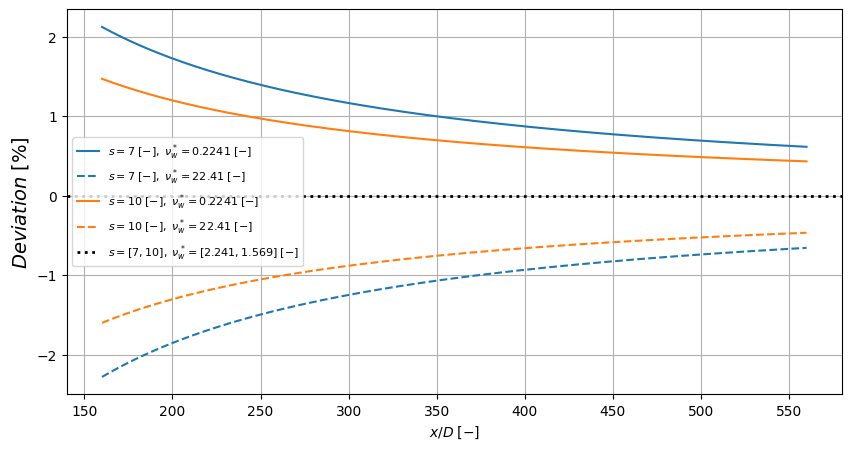

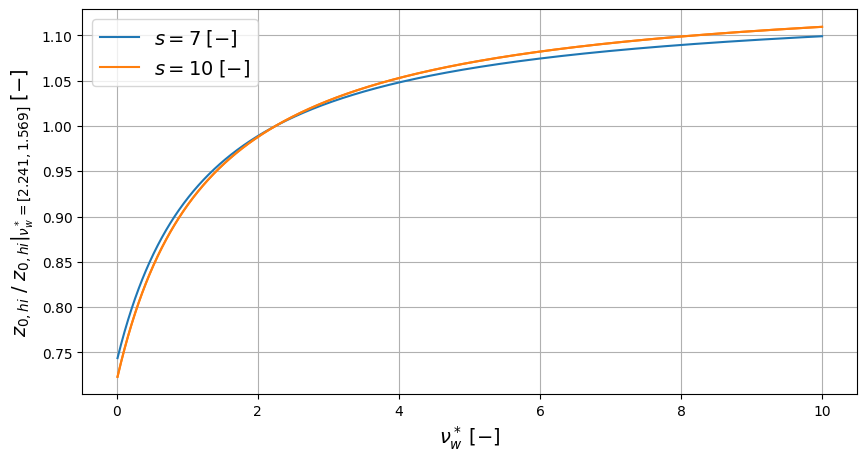

In [17]:
def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0, nufactor):

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = nufactor * 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**alpha)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**alpha)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed


    return x, uw, U_h0, nu_star

deviation_array_s7_d10 = []
deviation_array_s7_m10 = []
deviation_array_s10_d10 = []
deviation_array_s10_m10 = []


for i in range(0, 1000):

    d = np.linspace(26000, 66000, 1000)

    x_s7_d10, uw_s7_d10, U_h0_s7_d10, nu = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 0.10)
    deviation_array_s7_d10.append(U_h0_s7_d10-uw_s7_d10[-1])

    x_s7_m10, uw_s7_m10, U_h0_s7_m10, nu = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 10)
    deviation_array_s7_m10.append(U_h0_s7_a090-uw_s7_m10[-1])

    x_s10_d10, uw_s10_d10, U_h0_s10_d10, nu = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 0.10)
    deviation_array_s10_d10.append(U_h0_s10_d10-uw_s10_d10[-1])

    x_s10_m10, uw_s10_m10, U_h0_s10_m10, nu = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 10)
    deviation_array_s10_m10.append(U_h0_s10_m10-uw_s10_m10[-1])

x_s7_norm, uw_s7_norm, U_h0_s7_norm, nu = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 1.0)
print("nu: ", nu)
x_s10_norm, uw_s10_norm, U_h0_s10_norm, nu = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 1.0)
print("nu: ", nu)

deviation_array_s7_d10 = np.array(deviation_array_s7_d10)
deviation_array_s7_d10 = (deviation_array_s7_d10/uw_s7_norm[-1])*100

deviation_array_s7_m10 = np.array(deviation_array_s7_m10)
deviation_array_s7_m10 = (deviation_array_s7_m10/uw_s7_norm[-1])*100

deviation_array_s10_d10 = np.array(deviation_array_s10_d10)
deviation_array_s10_d10 = (deviation_array_s10_d10/uw_s10_norm[-1])*100

deviation_array_s10_m10 = np.array(deviation_array_s10_m10)
deviation_array_s10_m10 = (deviation_array_s10_m10/uw_s10_norm[-1])*100

plt.figure(figsize=(10, 5))
plt.plot(d/100-100, deviation_array_s7_d10, label=r'$ s = 7 \; [-], \; \nu_w^* = 0.2241 \; [-] $', color='#1f77b4')
plt.plot(d/100-100, -deviation_array_s7_m10, label=r'$ s = 7 \; [-], \; \nu_w^* = 22.41 \; [-] $', color='#1f77b4', linestyle='--')
plt.plot(d/100-100, deviation_array_s10_d10, label=r'$ s = 10 \; [-], \; \nu_w^* = 0.2241 \; [-] $', color='#ff7f0e')
plt.plot(d/100-100, -deviation_array_s10_m10, label=r'$ s = 10 \; [-], \; \nu_w^* = 22.41 \; [-] $', color='#ff7f0e', linestyle='--')
plt.axhline(0, color='k', linestyle=':', linewidth=2, label=r'$ s = [7, 10], \; \nu_w^* = [2.241, 1.569] \; [-] $')
plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ Deviation \; [\%] $', fontsize=14)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

s_x = 7
s_y = 7
ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
nu = np.linspace(0.01, 10, 1000)
beta =  nu / (1 + nu)
z0_WFs7 = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)

s_x = 10
s_y = 10
ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
nu = np.linspace(0.01, 10, 1000)
beta =  nu / (1 + nu)
z0_WFs10 = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)

plt.figure(figsize=(10, 5))
plt.plot(nu, z0_WFs7/z0_WFs7[224], color='#1f77b4', label=r'$ s=7 \; [-]$')
plt.plot(nu, z0_WFs10/z0_WFs10[224], color='#ff7f0e', label=r'$ s=10 \; [-]$')
plt.plot(nu, z0_WFs10/z0_WFs10[224], color='#ff7f0e')
plt.xlabel(r'$\nu^*_w \; [-]$', fontsize=14)
plt.ylabel(r'$ z_{0,hi} \; / \; z_{0,hi} |_{\nu^*_{w} = [2.241, 1.569]} \; [-] $', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

z0_WF s7 norm:  1.230543842078294
z0_WF s10 norm:  0.23568827613865057


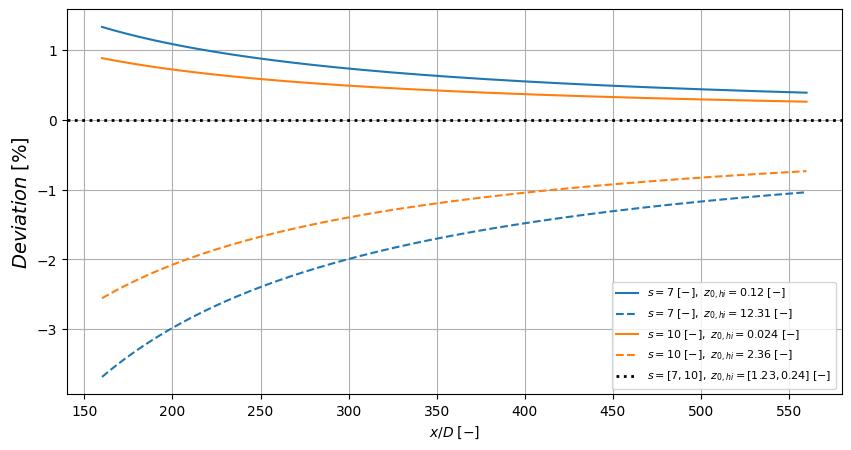

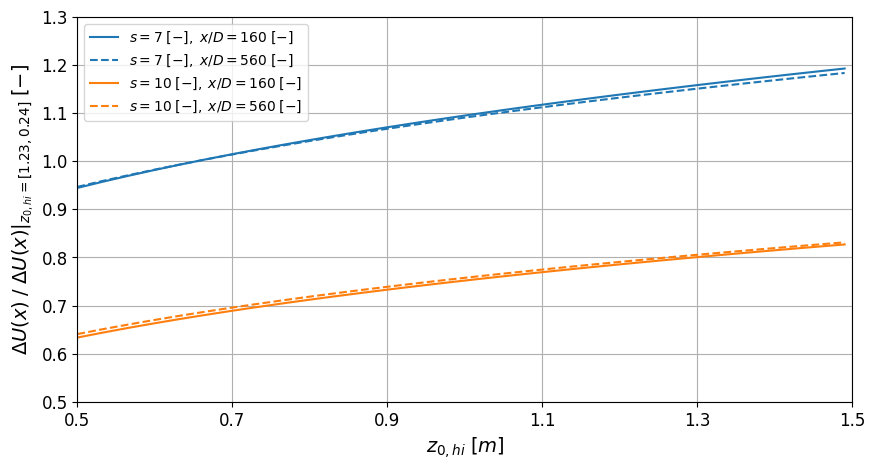

In [13]:
def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0, z0hifactor):

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = (z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )) * z0hifactor

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**alpha)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**alpha)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed


    return x, uw, U_h0, z0_WF

deviation_array_s7_d10 = []
deviation_array_s7_m10 = []
deviation_array_s10_d10 = []
deviation_array_s10_m10 = []


for i in range(0, 1000):

    d = np.linspace(26000, 66000, 1000)

    x_s7_d10, uw_s7_d10, U_h0_s7_d10, z0_WF = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 0.10)
    deviation_array_s7_d10.append(U_h0_s7_d10-uw_s7_d10[-1])

    x_s7_m10, uw_s7_m10, U_h0_s7_m10, z0_WF = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 10)
    deviation_array_s7_m10.append(U_h0_s7_a090-uw_s7_m10[-1])

    x_s10_d10, uw_s10_d10, U_h0_s10_d10, z0_WF = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 0.10)
    deviation_array_s10_d10.append(U_h0_s10_d10-uw_s10_d10[-1])

    x_s10_m10, uw_s10_m10, U_h0_s10_m10, z0_WF = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 10)
    deviation_array_s10_m10.append(U_h0_s10_m10-uw_s10_m10[-1])

x_s7_norm, uw_s7_norm, U_h0_s7_norm, z0_WF = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 7, 7, 10.0, 1.0)
print("z0_WF s7 norm: ", z0_WF)
x_s10_norm, uw_s10_norm, U_h0_s10_norm, z0_WF = calculate_wind_speed(0, 10000, int(d[i]) + 1, 100, 100, 0.8, 10, 10, 10.0, 1.0)
print("z0_WF s10 norm: ", z0_WF)

deviation_array_s7_d10 = np.array(deviation_array_s7_d10)
deviation_array_s7_d10 = (deviation_array_s7_d10/uw_s7_norm[-1])*100

deviation_array_s7_m10 = np.array(deviation_array_s7_m10)
deviation_array_s7_m10 = (deviation_array_s7_m10/uw_s7_norm[-1])*100

deviation_array_s10_d10 = np.array(deviation_array_s10_d10)
deviation_array_s10_d10 = (deviation_array_s10_d10/uw_s10_norm[-1])*100

deviation_array_s10_m10 = np.array(deviation_array_s10_m10)
deviation_array_s10_m10 = (deviation_array_s10_m10/uw_s10_norm[-1])*100

plt.figure(figsize=(10, 5))
plt.plot(d/100-100, deviation_array_s7_d10, label=r'$ s = 7 \; [-], \; z_{0,hi} = 0.12 \; [-] $', color='#1f77b4')
plt.plot(d/100-100, -deviation_array_s7_m10, label=r'$ s = 7 \; [-], \; z_{0,hi} = 12.31 \; [-] $', color='#1f77b4', linestyle='--')
plt.plot(d/100-100, deviation_array_s10_d10, label=r'$ s = 10 \; [-], \; z_{0,hi}= 0.024 \; [-] $', color='#ff7f0e')
plt.plot(d/100-100, -deviation_array_s10_m10, label=r'$ s = 10 \; [-], \; z_{0,hi} = 2.36 \; [-] $', color='#ff7f0e', linestyle='--')
plt.axhline(0, color='k', linestyle=':', linewidth=2, label=r'$ s = [7, 10], \; z_{0,hi} = [1.23, 0.24] \; [-] $')
plt.xlabel(r'$ x/D \; [-] $')
plt.ylabel(r'$ Deviation \; [\%] $', fontsize=14)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0, z0hifactor):

    # Constants
    k = 0.4  # Von Karman constant [-]
    z_0lo = 0.0001  # surface roughness length [m]

    # Define x-zone boundaries
    x1 = x1
    x2 = x2
    x3 = x3

    # Generate x array
    x = np.linspace(x1, x3, x3)
    n = len(x)

    # Thrust coefficient per area
    ct = (np.pi * C_T * D**2) / (8 * s_x * D * s_y * D)
    nu_star = 28 * np.sqrt(ct)
    beta = nu_star / (1 + nu_star)

    # Original scalar z0_WF
    z0_WF = (z_h * (1 + D / (2 * z_h))**beta * np.exp(
        -k * (ct + (k / np.log((z_h / z_0lo) * (1 - D / (2 * z_h))**beta))**2)**-0.5
    )) * z0hifactor

    # Initialize arrays
    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)
    uw = np.full_like(x, np.nan, dtype=float)

    # Compute internal boundary layer heights
    x_h1 = x[x > x1]
    idx_h1 = np.where(x > x1)[0]
    h1[idx_h1] = z0_WF * (z_h/z0_WF + (x_h1 / z0_WF)**alpha)

    x_h2 = x[x > x2]
    idx_h2 = np.where(x > x2)[0]
    h2[idx_h2] = z0_WF * (0/z0_WF + ((x_h2 - x2) / z0_WF)**alpha)

    # Wind speed profile in zone 1 (deficit)
    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (
        np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)
    ) / (
        np.log(h1[idx1] / z0_WF) * np.log(z_h / z_0lo)
    )

    # Wind speed profile in zone 2 (recovery)
    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (
        np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)
    ) / (
        np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo)
    )

    # You can now plot or export uw as needed


    return x, uw, U_h0

alpha_array_s7_160 = []
alpha_array_s7_560 = []
alpha_array_s10_160 = []
alpha_array_s10_560 = []

for i in range(0, 31):
    z0factor = 1.23/2 + i * 1.23/31

    x_s7_160, uw_s7_160, U_h0_s7_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 7, 7, 10.0, z0factor)
    alpha_array_s7_160.append(U_h0_s7_160-uw_s7_160[-1])

    x_s7_560, uw_s7_560, U_h0_s7_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 7, 7, 10.0, z0factor)
    alpha_array_s7_560.append(U_h0_s7_560-uw_s7_560[-1])

    z0factor = 0.24/2 + i * 0.24/31

    x_s10_160, uw_s10_160, U_h0_s10_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 10, 10, 10.0, z0factor)
    alpha_array_s10_160.append(U_h0_s10_160-uw_s10_160[-1])

    x_s10_560, uw_s10_560, U_h0_s10_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 10, 10, 10.0, z0factor)

    alpha_array_s10_560.append(U_h0_s10_560-uw_s10_560[-1])

x_norm_s7_160, uw_norm_s7_160, U_h0_norm_s7_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 7, 7, 10.0, 0.8)
U_norm_s7_160 = U_h0_norm_s7_160 - uw_norm_s7_160[-1]
alpha_array_s7_160 = np.array(alpha_array_s7_160)
alpha_array_norm_s7_160 = np.array(alpha_array_s7_160/U_norm_s7_160)

x_norm_s7_560, uw_norm_s7_560, U_h0_norm_s7_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 7, 7, 10.0, 0.8)
U_norm_s7_560 = U_h0_norm_s7_560 - uw_norm_s7_560[-1]
alpha_array_s7_560 = np.array(alpha_array_s7_560)
alpha_array_norm_s7_560 = np.array(alpha_array_s7_560/U_norm_s7_560)


x_norm_s10_160, uw_norm_s10_160, U_h0_norm_s10_160 = calculate_wind_speed(0, 10000, 26000 + 1, 100, 100, 0.8, 10, 10, 10.0, 0.8)
U_norm_s10_160 = U_h0_norm_s10_160 - uw_norm_s10_160[-1]
alpha_array_s10_160 = np.array(alpha_array_s10_160)

alpha_array_norm_s10_160 = np.array(alpha_array_s10_160/U_norm_s10_160)

x_norm_s10_560, uw_norm_s10_560, U_h0_norm_s10_560 = calculate_wind_speed(0, 10000, 66000 + 1, 100, 100, 0.8, 10, 10, 10.0, 0.8)
U_norm_s10_560 = U_h0_norm_s10_560 - uw_norm_s10_560[-1]
alpha_array_s10_560 = np.array(alpha_array_s10_560)
alpha_array_norm_s10_560 = np.array(alpha_array_s10_560/U_norm_s10_560)

x = np.arange(0.5, 1.5, 0.033)

plt.figure(figsize=(10, 5))
plt.plot(x, alpha_array_norm_s7_160, label=r'$ s = 7 \; [-], \; x/D = 160 \; [-] $', color='#1f77b4')
plt.plot(x, alpha_array_norm_s7_560, label=r'$ s = 7 \; [-], \; x/D = 560 \; [-] $', color='#1f77b4', linestyle='--')
plt.plot(x, alpha_array_norm_s10_160, label=r'$ s = 10 \; [-], \; x/D = 160 \; [-] $', color='#ff7f0e')
plt.plot(x, alpha_array_norm_s10_560, label=r'$ s = 10 \; [-], \; x/D = 560 \; [-] $', color='#ff7f0e', linestyle='--')
plt.xlabel(r'$ z_{0,hi} \; [m] $', fontsize=14)
plt.ylabel(r'$ \Delta U(x) \; / \; \Delta U(x) |_{z_{0,hi} = [1.23, 0.24]} \; [-] $', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.3)
plt.xlim(0.5, 1.5)
plt.xticks(np.linspace(0.5, 1.5, 6))  # or adjust number of ticks as needed
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# PYWAKE TO PYWAKE COMPARISON

P200D_s7 = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWake_200D_s7.csv")
P200D_s7_W = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWakeWeighted_200D_s7.csv")
P600D_s7 = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWake_600D_s7.csv")
P600D_s7_W = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWakeWeighted_600D_s7.csv")

P200D_s10 = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWake_200D_s10.csv")
P200D_s10_W = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWakeWeighted_200D_s10.csv")
P600D_s10 = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWake_600D_s10.csv")
P600D_s10_W = pd.read_csv("/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWakeWeighted_600D_s10.csv")

# Plot for s = 10
plt.figure(figsize=(8, 6))
plt.plot(P200D_s10['y [D]'], P200D_s10['U / U0'], label=r'$ BGD_L: x = 200D, \; s=10 $', color='#1f77b4')
plt.plot(P200D_s10_W['y [D]'], P200D_s10_W['U / U0'], label=r'$ BGD_W: x = 200D, s=10 $', linestyle='--', color='#1f77b4')
plt.plot(P600D_s10['y [D]'], P600D_s10['U / U0'], label=r'$ BGD_L: x = 600D, \; s=10 $', color='#ff7f0e')
plt.plot(P600D_s10_W['y [D]'], P600D_s10_W['U / U0'], label=r'$ BGD_W: x = 600D, s=10 $', linestyle='--', color='#ff7f0e')
plt.xlabel(r'$ y \;[D] $')
plt.ylabel(r'$ U/U_0 $')
plt.legend(loc='lower left')
plt.ylim(0.97, 1.002)
plt.grid(True)
plt.show()

# Plot for s = 7
plt.figure(figsize=(8, 6))
plt.plot(P200D_s7['y [D]'], P200D_s7['U / U0'], label=r'$ BGD_L: x = 200D, \; s=7 $', color='#1f77b4')
plt.plot(P200D_s7_W['y [D]'], P200D_s7_W['U / U0'], label=r'$ BGD_W: x = 200D, s=7 $', linestyle='--', color='#1f77b4')
plt.plot(P600D_s7['y [D]'], P600D_s7['U / U0'], label=r'$ BGD_L: x = 600D, \; s=7 $', color='#ff7f0e')
plt.plot(P600D_s7_W['y [D]'], P600D_s7_W['U / U0'], label=r'$ BGD_W: x = 600D, s=7 $', linestyle='--', color='#ff7f0e')
plt.xlabel(r'$ y \;[D] $')
plt.ylabel(r'$ U/U_0 $')
plt.legend(loc='lower left')
plt.ylim(0.97, 1.002)
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/madslangkjaerjakobsen/Desktop/WTABL/Pywake/PyWake_200D_s7.csv'